In [1]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


# Dataset

There are 60000 images in training dataset
There are 10000 images in training dataset
___________________


Randomly printing 10 images with labels from training dataset
index: 15356
Lable: 1


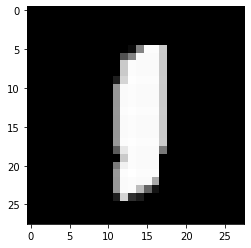

index: 43457
Lable: 6


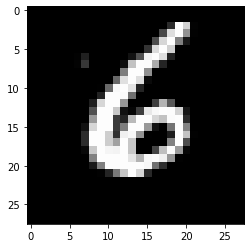

index: 55593
Lable: 0


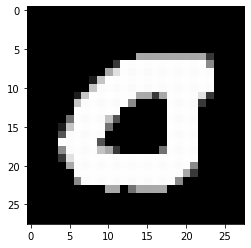

index: 48076
Lable: 3


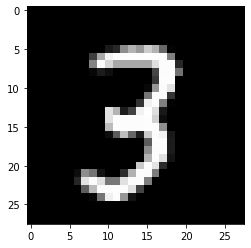

index: 9330
Lable: 5


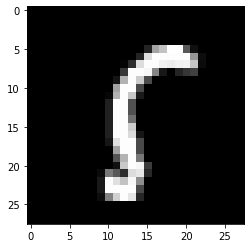

index: 13160
Lable: 1


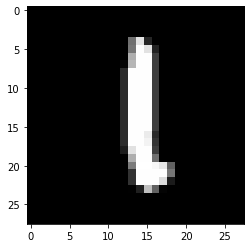

index: 30720
Lable: 3


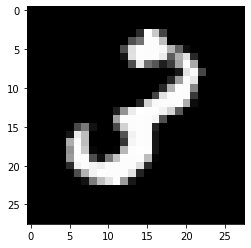

index: 47251
Lable: 5


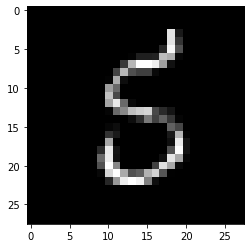

index: 48250
Lable: 7


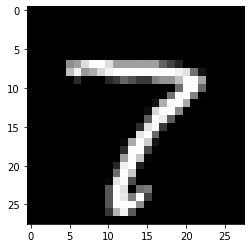

index: 31271
Lable: 7


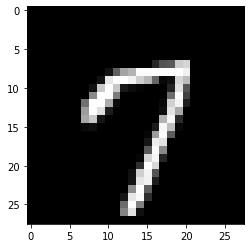

___________________


Randomly printing 10 images with labels from testing dataset
index: 58410
Lable: 3


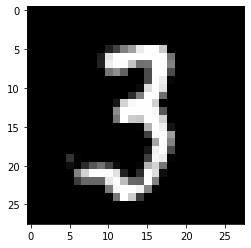

index: 10394
Lable: 7


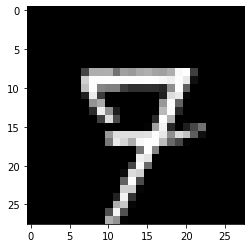

index: 36229
Lable: 2


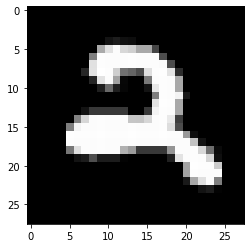

index: 19825
Lable: 5


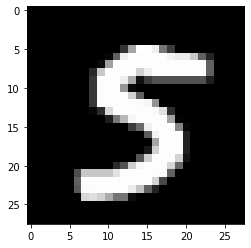

index: 536
Lable: 6


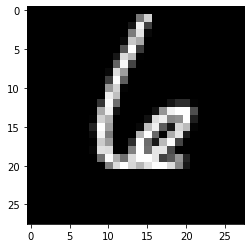

index: 1297
Lable: 6


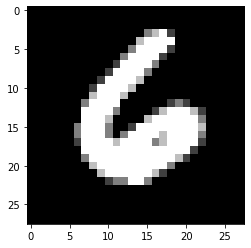

index: 44450
Lable: 9


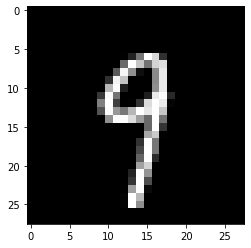

index: 15326
Lable: 9


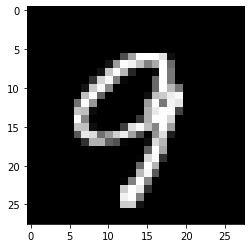

index: 25053
Lable: 4


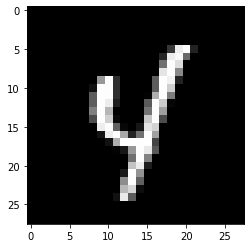

index: 59398
Lable: 3


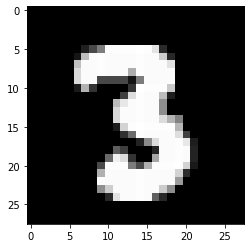

___________________


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [2]:
# Loading dataset
dataset = tensorflow.keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Each image is of shape 28x28
# print(dataset[0][0][0].shape)
# print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")





In [3]:
dataset[1][1].shape

(10000,)

# Task

You have to reduce the size of this dataset by 10 times.

There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.

You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)

new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset.


In [4]:
# Your code here
train_set,train_labels= dataset[0][0],dataset[0][1]
counter= collections.Counter(dataset[0][1])

In [6]:
counter

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [7]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train=[]
y_train=[]
for i in counter.keys():
    x= np.argwhere(train_labels==i)
    print(x.shape)
    #training_set[i]=train_set[x]
    #new_training= train_set[x]
    x_train.append(train_set[x])
    y_train.append(train_labels[x])
train_images=[]
training_labels=[]
for i in range(len(x_train)):
    train_images.append(x_train[i][:600])
    training_labels.append(y_train[i][:600])
print(train_images[2].shape)
training_labels[2].shape

(5421, 1)
(5923, 1)
(5842, 1)
(6742, 1)
(5949, 1)
(5958, 1)
(6131, 1)
(5918, 1)
(6265, 1)
(5851, 1)
(600, 1, 28, 28)


(600, 1)

In [10]:
len(training_labels)

10

In [9]:
train_images= np.array(train_images).reshape(-1,28,28)
train_images.shape

(6000, 28, 28)

In [10]:
training_labels= np.array(training_labels).reshape(-1,)
training_labels.shape

(6000,)

In [15]:
#new_dataset= np.concatenate(train_images,training_labels)
#new_dataset[0]

In [ ]:
for i in counter.keys():
    train_set[]

In [17]:
test_set, test_labels= dataset[1][0], dataset[1][1]

In [21]:
x_test=[]
y_test=[]
for i in counter.keys():
    x= np.argwhere(test_labels==i)
    print(x.shape)
    #training_set[i]=train_set[x]
    #new_training= train_set[x]
    x_test.append(test_set[x])
    y_test.append(test_labels[x])
test_images=[]
testing_labels=[]
for i in range(len(x_test)):
    test_images.append(x_test[i][:100])
    testing_labels.append(y_test[i][:100])
print(train_images[2].shape)
test_images= np.array(test_images).reshape(-1,28,28)
test_labels= np.array(testing_labels).reshape(-1,)


(892, 1)
(980, 1)
(982, 1)
(1135, 1)
(1009, 1)
(1032, 1)
(1010, 1)
(958, 1)
(1028, 1)
(974, 1)
(28, 28)


(100, 1)

(1000, 28, 28)

In [24]:
test_labels.shape

(1000,)

In [40]:
new_dataset= (train_images,training_labels),(test_images,test_labels)

# Validation of Task

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 600,
         0: 600,
         4: 600,
         1: 600,
         9: 600,
         2: 600,
         3: 600,
         6: 600,
         7: 600,
         8: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 100,
         0: 100,
         4: 100,
         1: 100,
         9: 100,
         2: 100,
         3: 100,
         6: 100,
         7: 100,
         8: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 5464
Lable: 8


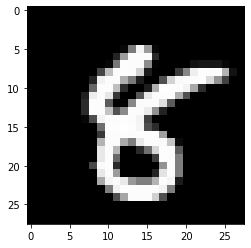

index: 1464
Lable: 4


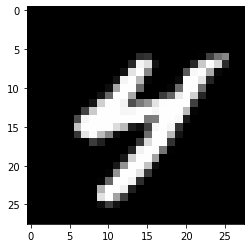

index: 2929
Lable: 9


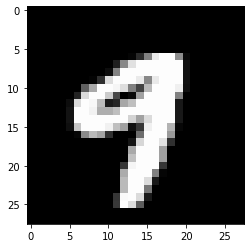

index: 3149
Lable: 2


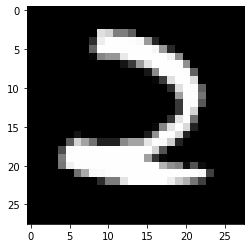

index: 586
Lable: 5


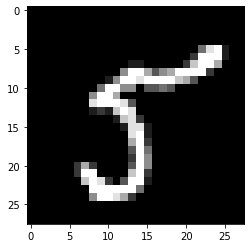

index: 2129
Lable: 1


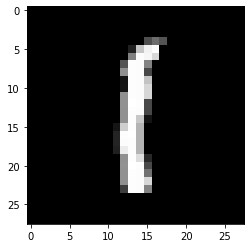

index: 5890
Lable: 8


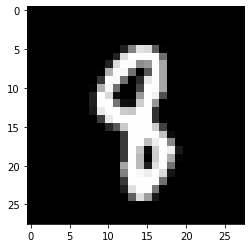

index: 3445
Lable: 2


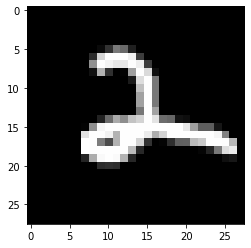

index: 724
Lable: 0


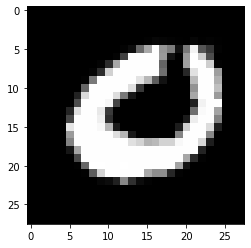

index: 3033
Lable: 2


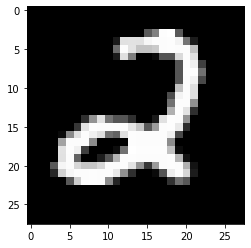

___________________


Randomly printing 10 images with labels from testing dataset
index: 4739
Lable: 6


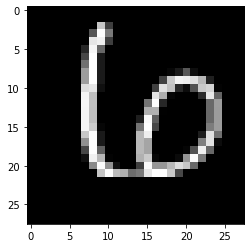

index: 1452
Lable: 4


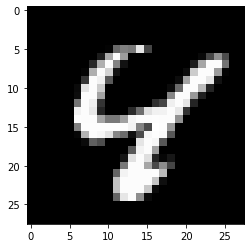

index: 2356
Lable: 1


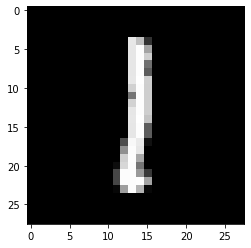

index: 1682
Lable: 4


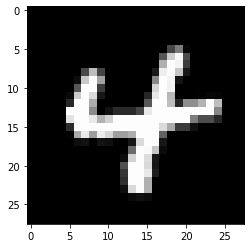

index: 5547
Lable: 8


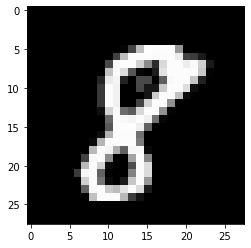

index: 2537
Lable: 9


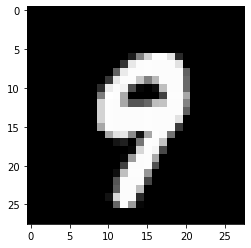

index: 3180
Lable: 2


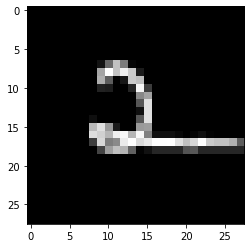

index: 304
Lable: 5


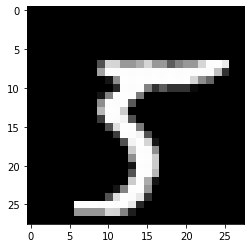

index: 900
Lable: 0


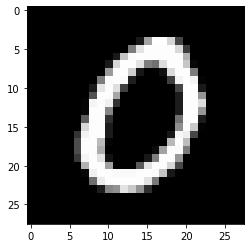

index: 3676
Lable: 3


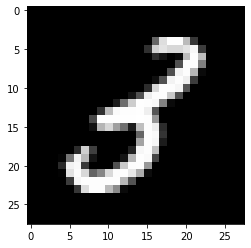

___________________




In [41]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")

